# <font color='aqua'> **MACHINE LEARNING : REGRESSION** </font>
## **ALGORITHM : LINEAR REGRESSION**
### **CAR PRICE**
#### **Source : https://www.kaggle.com/datasets/imgowthamg/car-price?resource=download**

**Libraries**

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from scipy.stats import normaltest

# Data Splitting
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# ML algorithm
from sklearn.linear_model import LinearRegression

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

## **Business Understanding**
### **About Dataset**
This dataset contains information about different car models, with attributes such as insurance risk rating, car company, fuel type, aspiration, number of doors, body style, drive wheel type, engine location, dimensions (wheelbase, length, width, height), weight, engine type, cylinder count, engine size, fuel system, engine specifications (bore ratio, stroke, compression ratio, horsepower, peak RPM), and mileage (city and highway). The goal could be to analyze or predict the car's price based on these attributes.



#### **Load Dataset**

In [4]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.sample(6)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
198,199,-2,volvo 264gl,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420.0
98,99,2,nissan clipper,gas,std,two,hardtop,fwd,front,95.1,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,8249.0
10,11,2,bmw 320i,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430.0
52,53,1,mazda rx2 coupe,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6795.0
90,91,1,nissan gt-r,diesel,std,two,sedan,fwd,front,94.5,...,103,idi,2.99,3.47,21.9,55,4800,45,50,7099.0
68,69,-1,buick century luxus (sw),diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28248.0


<table>
<h2><b> Data Dictionary</b></h2>
  <tr>
    <th>Column</th>
    <th>Description</th>
    <th>Type</th>
  </tr>
  <tr>
    <td>Car_ID</td>
    <td>Unique id of each observation.</td>
    <td>Integer</td>
  </tr>
    <tr>
    <td>Symboling</td>
    <td>Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.</td>
    <td>Categorical</td>
  </tr>
    <tr>
    <td>carCompany</td>
    <td>Name of Car Company</td>
    <td>Categorical</td>
  </tr>
    <tr>
    <td>fueltype</td>
    <td>Car fuel type i.e gas or diesel. </td>
    <td>Categorical</td>
  </tr>
    <tr>
    <td>aspiration</td>
    <td>Aspiration used in a car.</td>
    <td>Categorical</td>
  </tr>
    <tr>
    <td>doornumber</td>
    <td>Number of doors in a car.</td>
    <td>Categorical</td>
  </tr>
    <tr>
    <td>carbody</td>
    <td>body of car.</td>
    <td>Categorical.</td>
  </tr>
  <tr>
    <td>enginelocation.</td>
    <td>Location of car engine.</td>
    <td>Categorical.</td>
  </tr>
  <tr>
    <td>wheelbase</td>
    <td>wheel base of car</td>
    <td>Numeric</td>
  </tr>
  <tr>
    <td>carlength</td>
    <td>Length of car</td>
    <td>Numeric</td>
  </tr>
  <tr>
    <td>carwidth</td>
    <td>Width of car</td>
    <td>Numeric</td>
  </tr>
  <tr>
    <td>carheight</td>
    <td>Height of car</td>
    <td>Numeric</td>
  </tr>
  <tr>
    <td>curbweight</td>
    <td>The weight of a car without occupatns or baggage.</td>
    <td>Numeric</td>
  </tr>
  <tr>
    <td>enginetype</td>
    <td>Type of engine.</td>
    <td>.Categorical</td>
  </tr>
  <tr>
    <td>cylindernumber</td>
    <td>Cylinder placed in the car.</td>
    <td>Categorical</td>
  </tr>
  <tr>
    <td>enginesize</td>
    <td>size of engine car.</td>
    <td>Numeric</td>
  </tr>
<tr>
    <td>fuelsystem</td>
    <td>Fuel system of car</td>
    <td>Categorical</td>
</tr>
<tr>
    <td>boreratio</td>
    <td>Boreratio of car.</td>
    <td>Numeric</td>
</tr>
<tr>
    <td>stroke</td>
    <td>Stroke or volume inside the engine.</td>
    <td>Numeric</td>
</tr>
<tr>
    <td>compressionratio</td>
    <td>compression ratio of car</td>
    <td>Numeric</td>
</tr>
<tr>
    <td>horsepower</td>
    <td>Horsepower</td>
    <td>Numeric</td>
</tr>
<tr>
    <td>peakrpm</td>
    <td>car peak rpm</td>
    <td>Numeric</td>
</tr>
<tr>
    <td>citympg</td>
    <td>Mileage in city</td>
    <td>Numeric</td>
</tr>
<tr>
    <td>highwaympg</td>
    <td>Mileage in highway</td>
    <td>Numeric</td>
</tr>
<tr>
    <td>price</td>
    <td>Price of car</td>
    <td>Numeric</td>
</tr>
</table>

<hr>

# **Data Understanding**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

- Interpretation :
    - Terdapat 16 kolom numerik dan 10 kolom objek.
    - Terdapat 205 baris data. 
    - Tidak terdapat missing values (null)
    

# **Descriptive Statistics**

**Numerical Columns**

In [8]:
df.describe().columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

**Categorical Columns**

In [ ]:
df.describe(include='O')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


**Missing Values**

In [ ]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**Duplicated Rows**

In [ ]:
df.duplicated().sum()

0

In [ ]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().head(7).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(205, 26)


,dataFeatures,dataType,null,unique,uniqueSample
0,car_ID,int64,0,205,"[1, 2, 3, 4, 5, 6, 7]"
1,symboling,int64,0,6,"[3, 1, 2, 0, -1, -2]"
2,CarName,object,0,147,"[alfa-romero giulia, alfa-romero stelvio, alfa..."
3,fueltype,object,0,2,"[gas, diesel]"
4,aspiration,object,0,2,"[std, turbo]"
5,doornumber,object,0,2,"[two, four]"
6,carbody,object,0,5,"[convertible, hatchback, sedan, wagon, hardtop]"
7,drivewheel,object,0,3,"[rwd, fwd, 4wd]"
8,enginelocation,object,0,2,"[front, rear]"
9,wheelbase,float64,0,53,"[88.6, 94.5, 99.8, 99.4, 105.8, 99.5, 101.2]"


# **Exploratory Data Analysis (EDA)**

## **Numerical Features Data Distribution**

In [12]:
numerical_list = df.describe().columns
categorical_list = df.describe(include="O").columns

In [23]:
len(numerical_list)

16

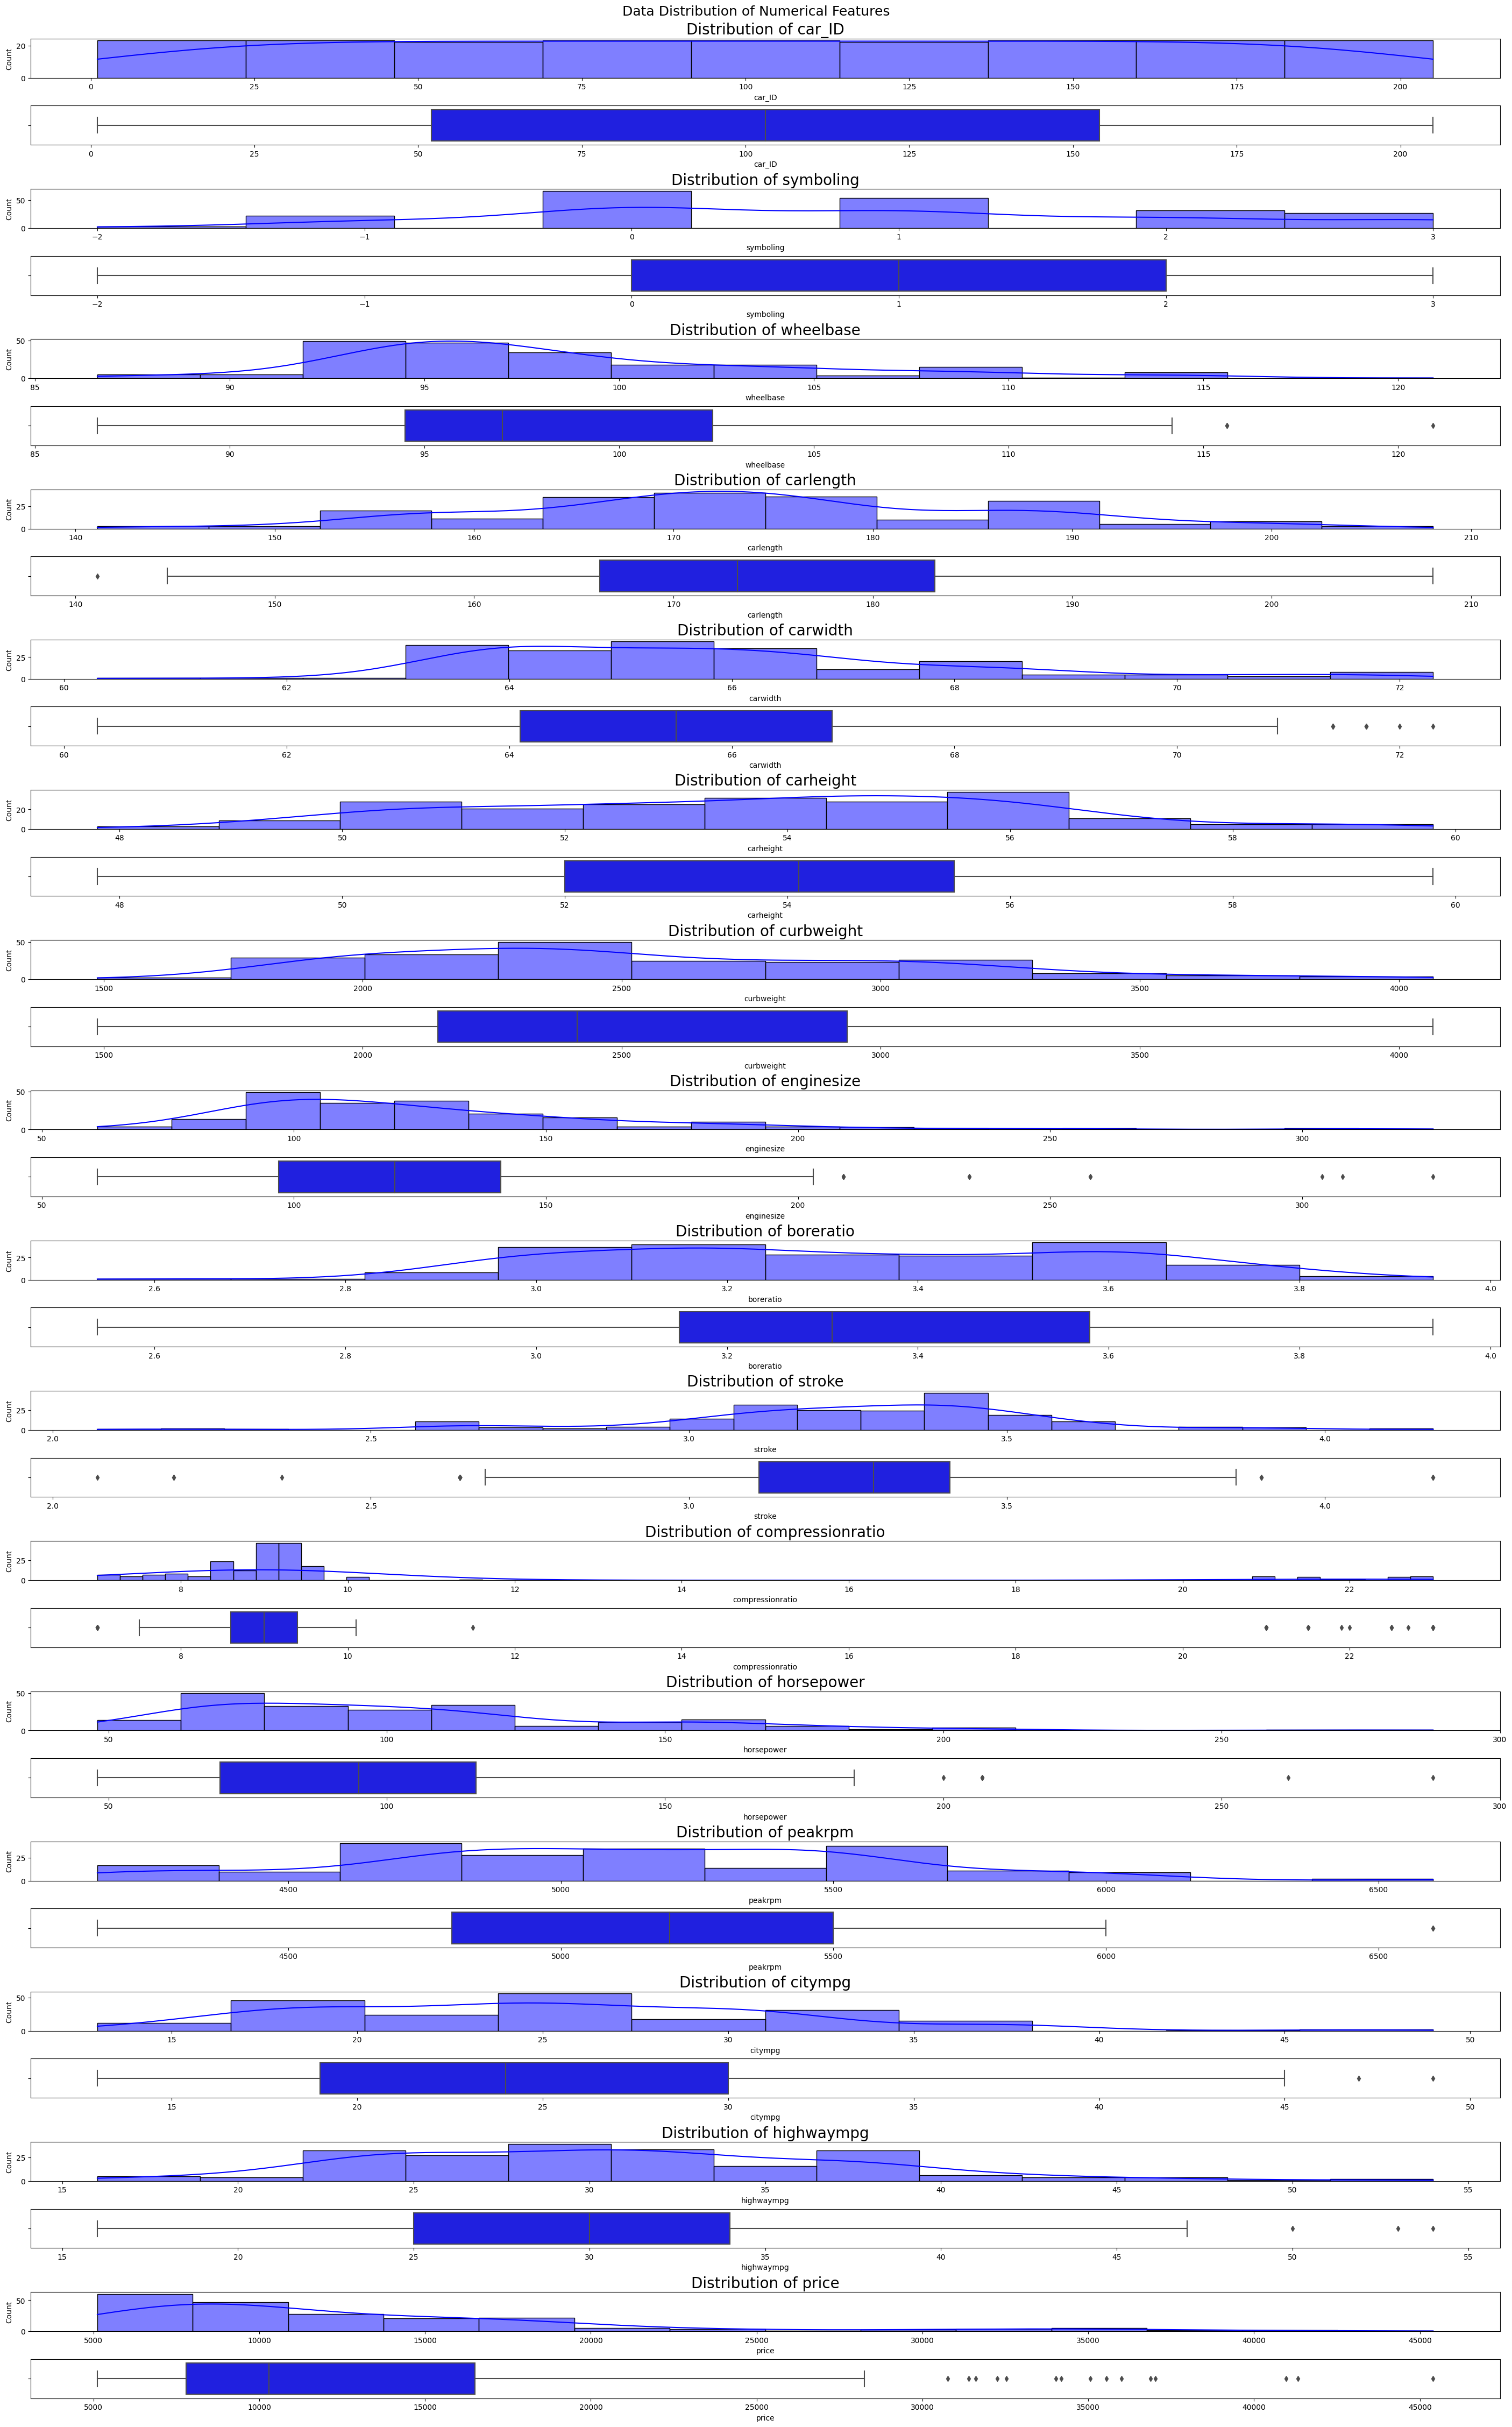

In [29]:
fig, axes = plt.subplots(nrows = 32, ncols = 1, figsize=(28,45),
                         gridspec_kw={"hspace": 0.05},constrained_layout = True)
plt.suptitle("Data Distribution of Numerical Features", size = 18)
counter1 = 0
for col in numerical_list:  
    axes[counter1].set_title(f"Distribution of {col}", color = "black")
    axes[counter1].title.set_size(20)
    sns.histplot(data = df, x = col, ax=axes[counter1], color='b', kde=True)
    counter1 +=1
    sns.boxplot(data = df, x = col, ax=axes[counter1], color='b')
    counter1 +=1
plt.show()
  